# Team Project 2 for Team#21

Business Case: Analyzing Factors Influencing Term Deposit Acquisition

Executive Summary

This business case explores the relationship between customer demographics, financial standing, and campaign strategy on the likelihood of acquiring a term deposit. By understanding these factors, our bank can refine marketing strategies, improve customer targeting, and ultimately increase term deposit sales.

Objectives

1. Identify key customer demographics that influence term deposit acquisition.
2. Assess the impact of financial standing on customer decisions. 
3. Evaluate the effectiveness of current campaign strategies. 
4. Develop actionable recommendations to enhance marketing efforts.

Background

Term deposits are a cornerstone of our savings products, providing a secure investment option for customers. However, recent trends indicate a need to better understand the factors influencing customer decisions in order to optimize our marketing strategies and increase conversions.

### Major Steps

To use Python for analyzing the provided dataset and answering the research questions, we follow these steps. Below is a general outline for using Python to approach these research questions:

##### Steps:
1. **Step1**: Import Necessary Libraries.
2. **Step2**: Load the dataset.
3. **Step3**: Data Exploration.
4. **Step4**: Data Preprocessing.
5. **Step5**: Identify Key Customer Demographics.
6. **Step6**: Assess Financial Standing.
7. **Step7**: Evaluate Campaign Effectiveness.
8. **Step8**: Recommendations.

#### **Step 1: Import Necessary Libraries** 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### **Step 2: Load the Dataset**

In [4]:
# Load the dataset
df = pd.read_csv('C:\\Tina Lin\\Training\\DSI\\Projects\\Datasets\\bank.csv')

#### **Step 3: Data Exploration**

Explore the data to understand its structure and identify any missing values or data quality issues.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  outcome    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
               age       balance          day     duration     campaign  \
count  4521.000000 

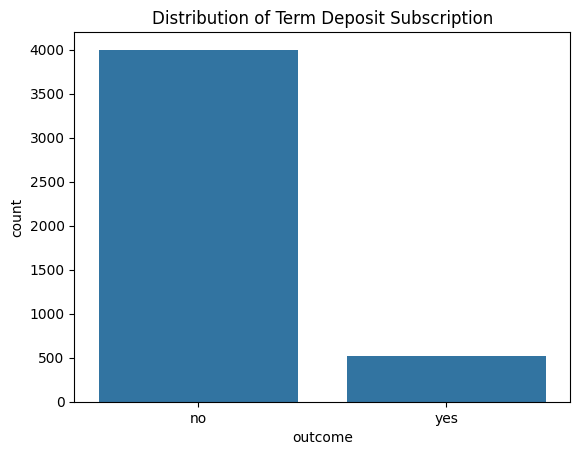

In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Show the distribution of the target variable
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.show()

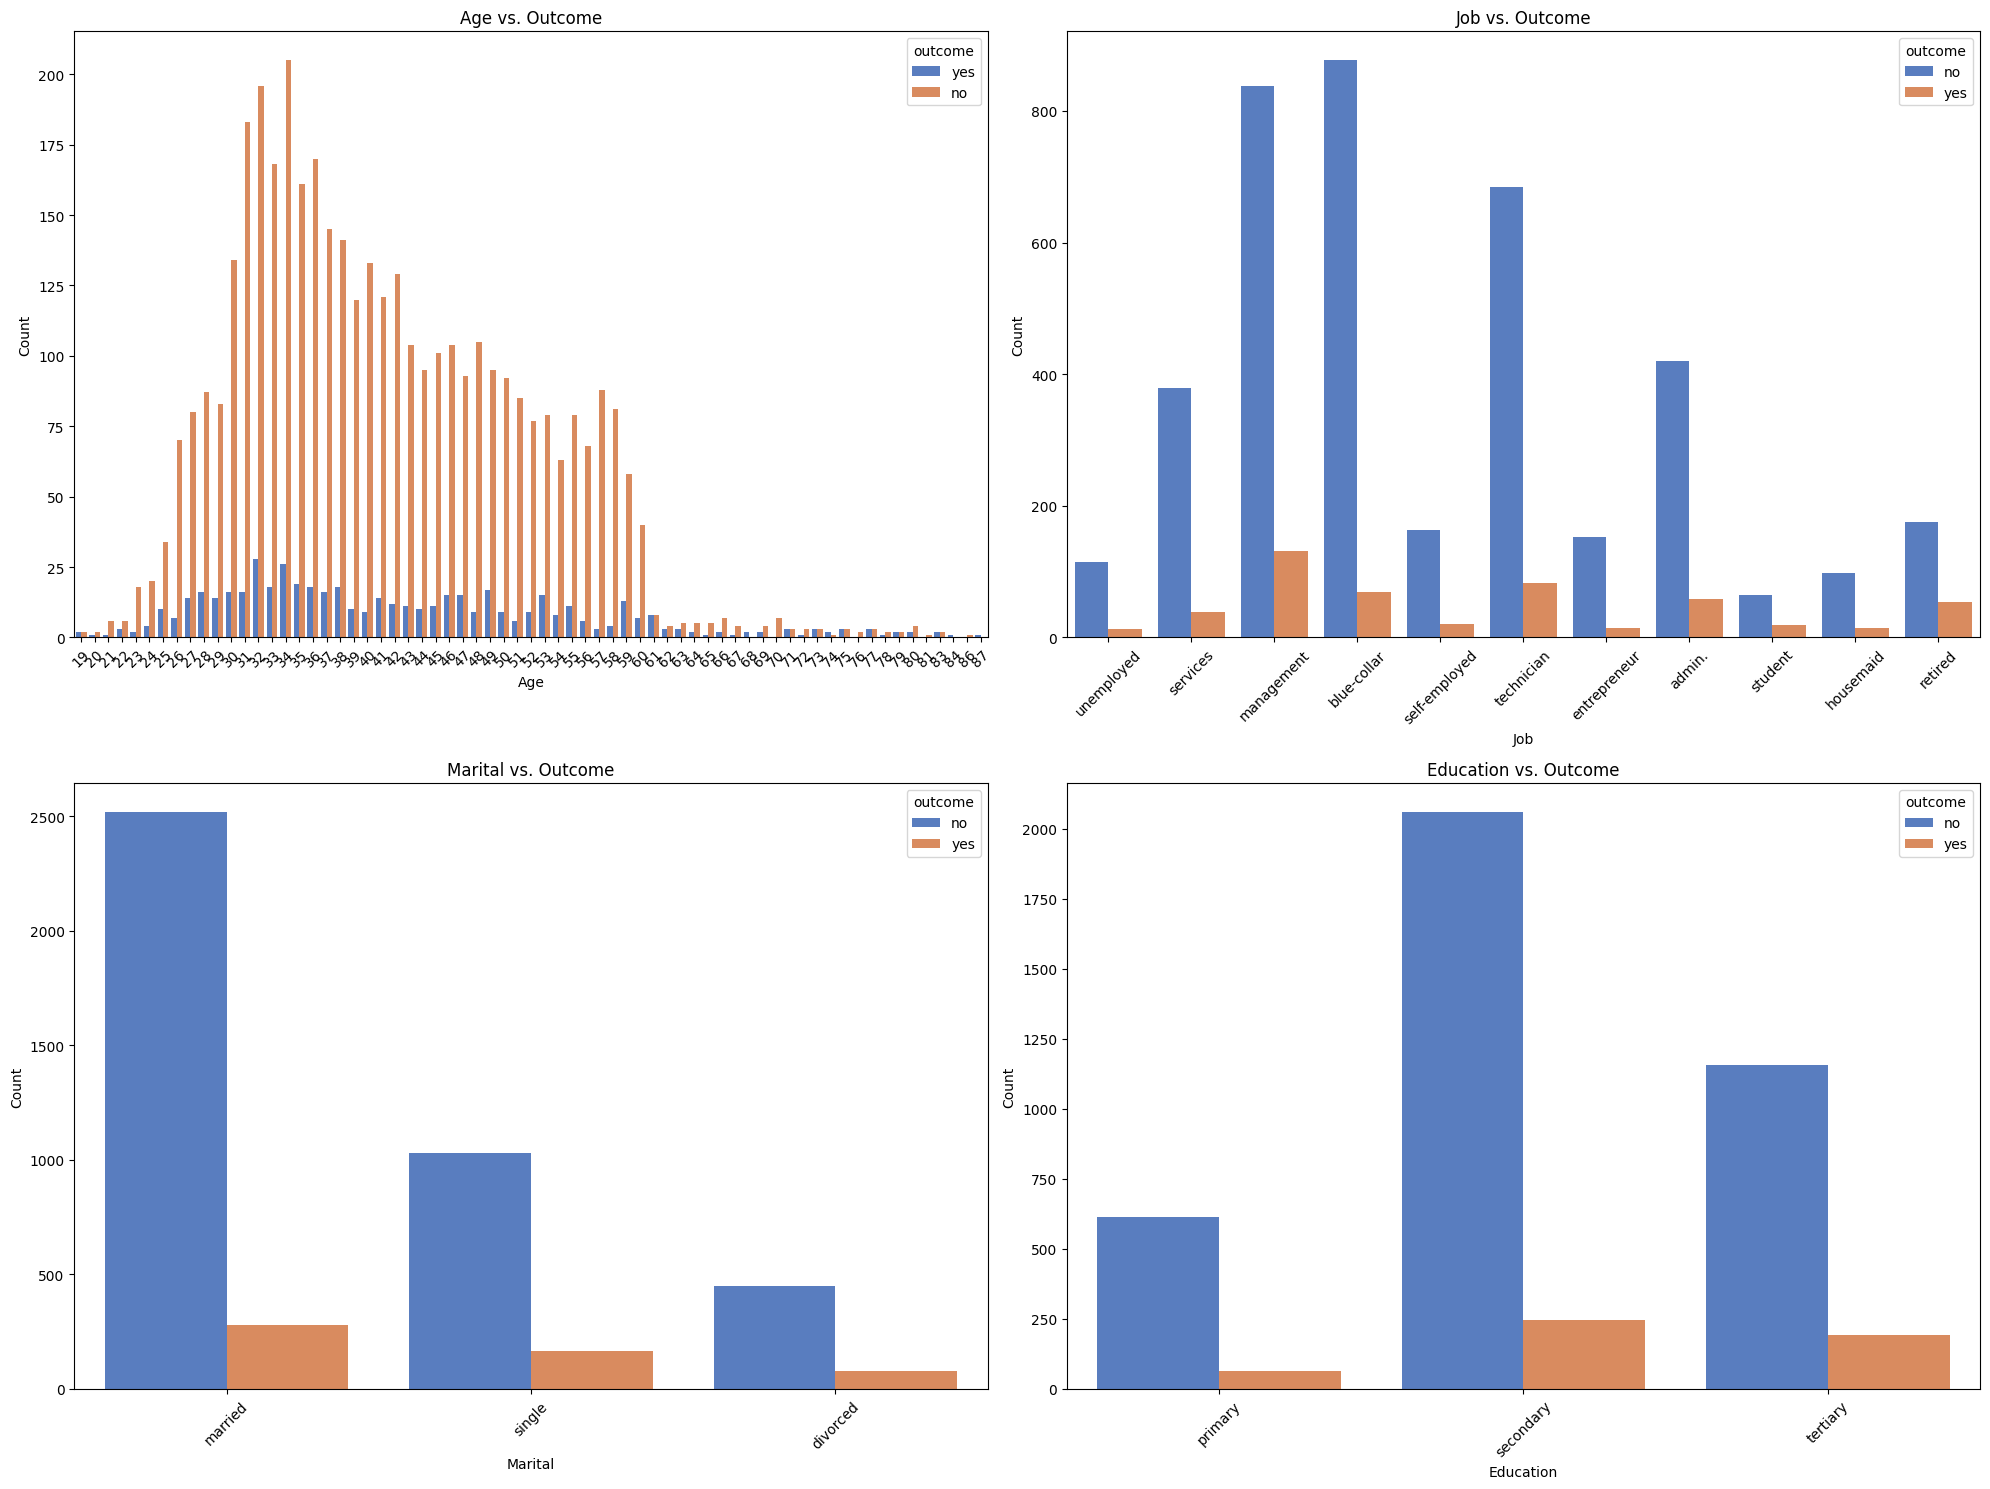

In [15]:
# Analyze the relationship between customer demographics and the outcome
demographic_columns = ['age', 'job', 'marital', 'education']

# Visualizing categorical features vs. outcome
plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='outcome', data=df, palette='muted')
    plt.title(f"{col.capitalize()} vs. Outcome")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Step 4: Data Preprocessing**

1. Handle any missing values if present.

In [17]:
# Check for 'unknown' or placeholder values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col} unique values:", df[col].unique())

job unique values: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired' <NA>]
marital unique values: ['married' 'single' 'divorced']
education unique values: ['primary' 'secondary' 'tertiary' <NA>]
default unique values: ['no' 'yes']
housing unique values: ['no' 'yes']
loan unique values: ['no' 'yes']
contact unique values: ['cellular' <NA> 'telephone']
month unique values: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome unique values: [<NA> 'failure' 'other' 'success']
outcome unique values: ['no' 'yes']


In [18]:
# Any missing data, treat them as NA values
#df.replace('unknown', pd.NA, inplace=True)

# Impute 'unknown' values with the mode
for col in df.select_dtypes(include='object').columns:
    if 'unknown' in df[col].unique():
        mode_value = df[col].mode()[0]
        df[col] = df[col].replace('unknown', mode_value)

C:\Users\ryanw\AppData\Local\Temp\ipykernel_28908\790917227.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[col].unique():


In [19]:
# Verify replacement
for col in df.select_dtypes(include='object').columns:
   print(f"{col} - 'unknown' count after imputation: {df[col].value_counts().get('unknown', 0)}")

job - 'unknown' count after imputation: 0
marital - 'unknown' count after imputation: 0
education - 'unknown' count after imputation: 0
default - 'unknown' count after imputation: 0
housing - 'unknown' count after imputation: 0
loan - 'unknown' count after imputation: 0
contact - 'unknown' count after imputation: 0
month - 'unknown' count after imputation: 0
poutcome - 'unknown' count after imputation: 0
outcome - 'unknown' count after imputation: 0


In [27]:
# Encoding categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Encoding the target variable
label_encoder = LabelEncoder()
df_encoded['outcome'] = label_encoder.fit_transform(df_encoded['outcome'])

# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Checking the transformed data
print(df_encoded.head())

        age   balance       day  duration  campaign     pdays  previous  \
0 -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413   
1 -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734   
2 -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124   
3 -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413   
4  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413   

   outcome  job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  \
0        0                0                 0  ...          0          0   
1        0                0                 0  ...          0          0   
2        0                0                 0  ...          0          0   
3        0                0                 0  ...          0          1   
4        0                1                 0  ...          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0    

#### **Step 5: Identify Key Customer Demographics**

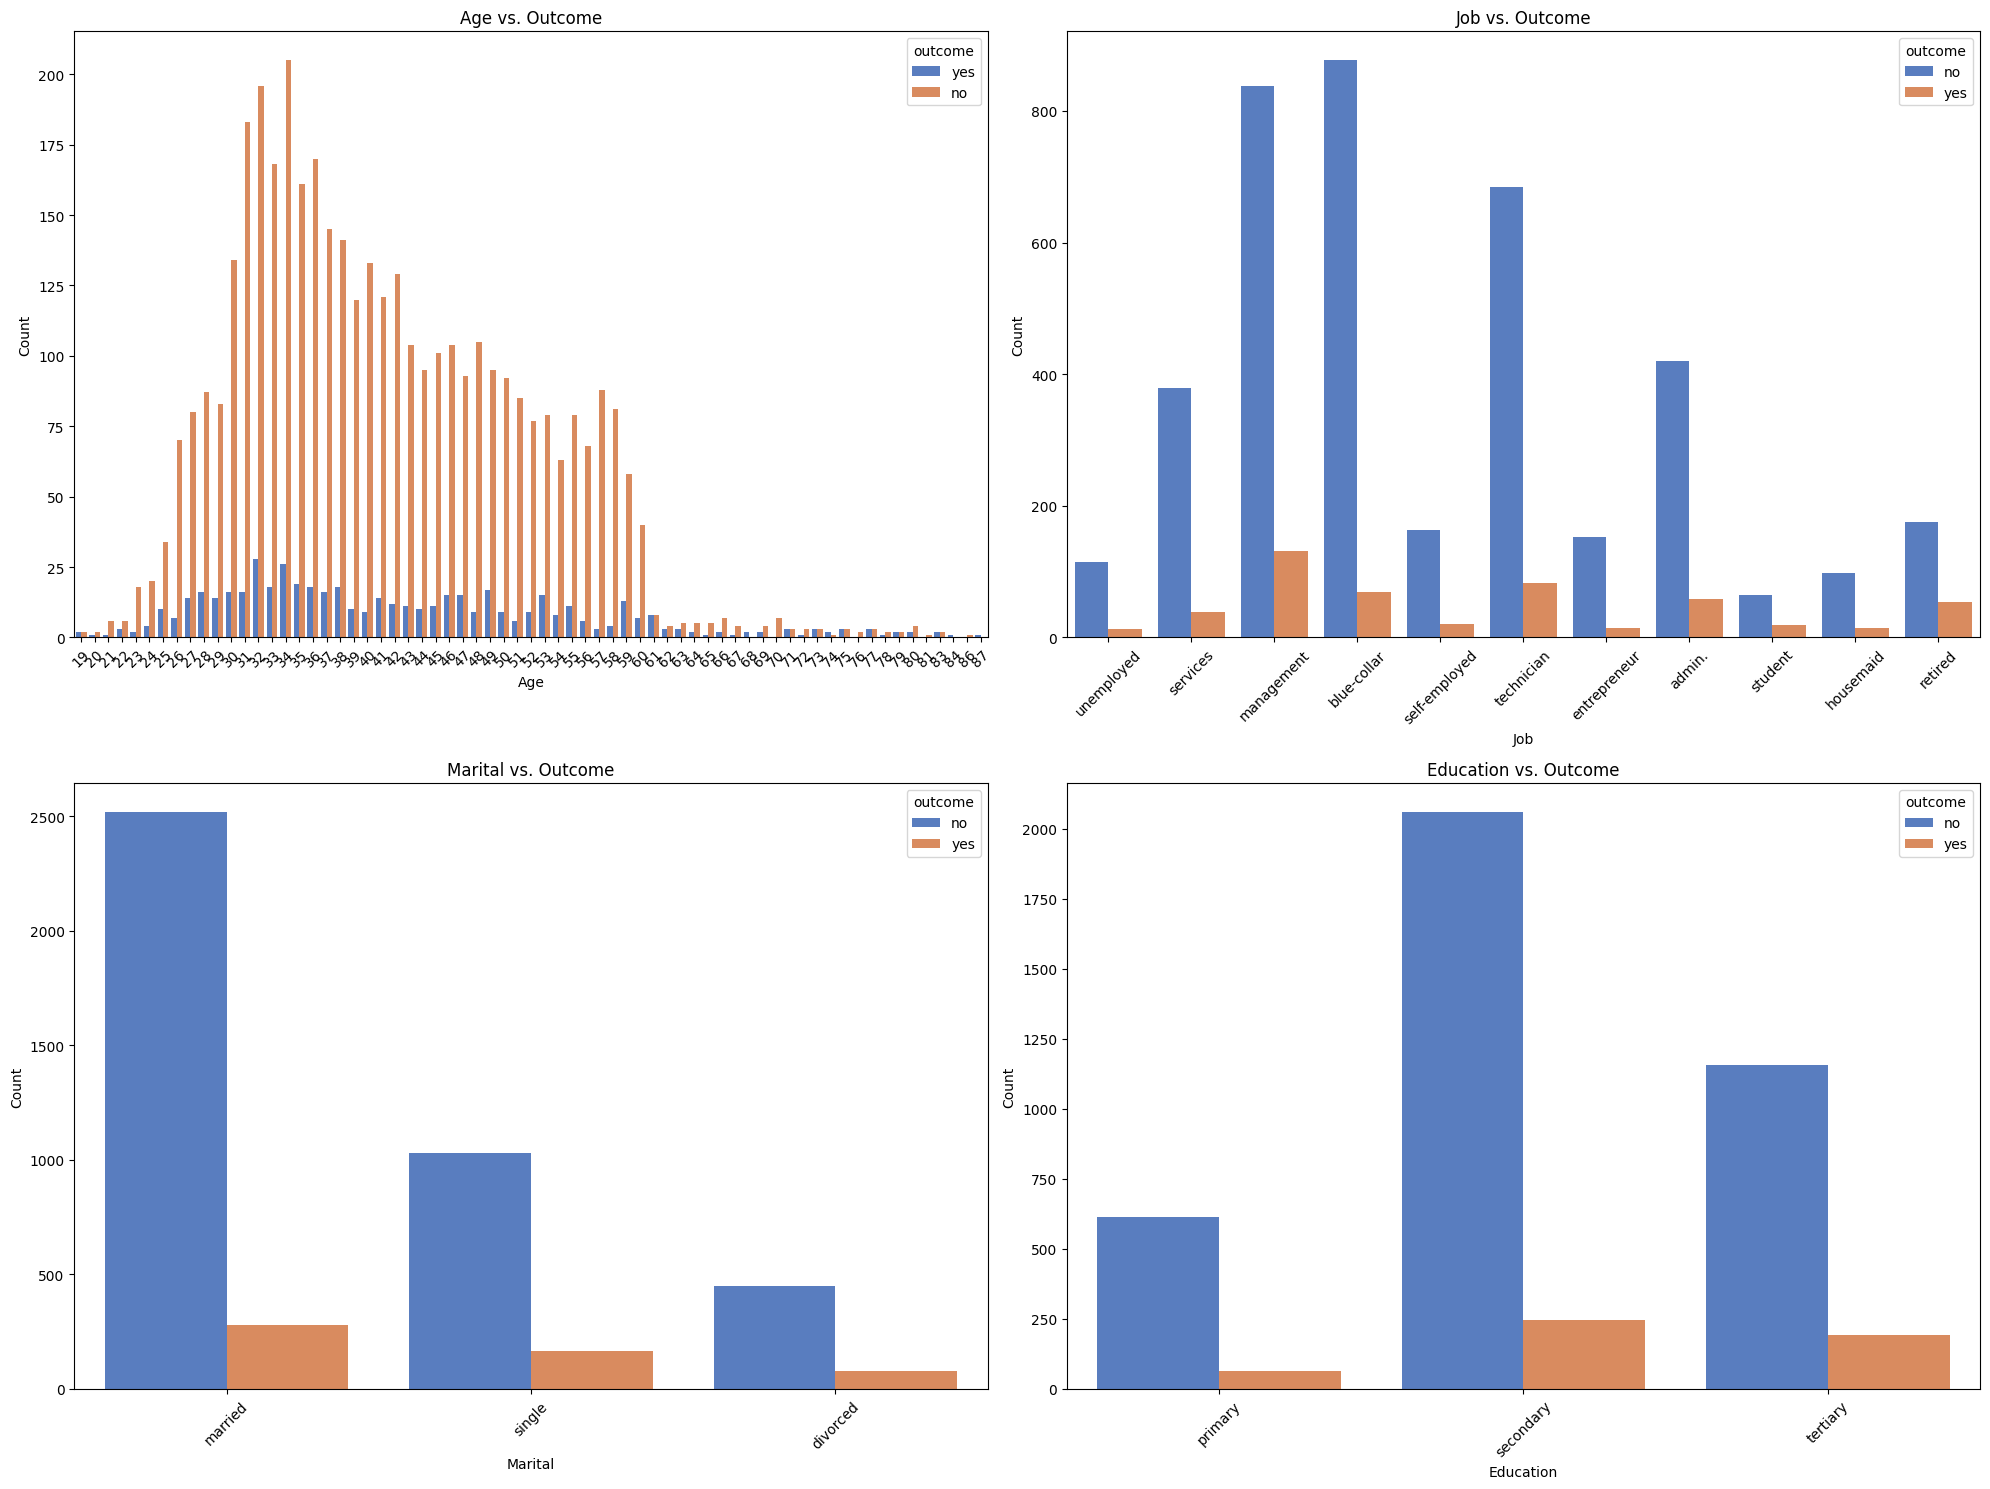

In [21]:
# Visualize Demographics vs. Outcome
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the relationship between customer demographics and the outcome
demographic_columns = ['age', 'job', 'marital', 'education']

# Visualizing categorical features vs. outcome
plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='outcome', data=df, palette='muted')
    plt.title(f"{col.capitalize()} vs. Outcome")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Step 6: Assess Financial Standing**

1. Distribution of balance by outcome.
2. Compare the financial standing for customers with and without a term deposit.
3. Assess categorical features like loan and housing.

C:\Users\ryanw\AppData\Local\Temp\ipykernel_28908\428475099.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='balance', data=df, palette='muted')


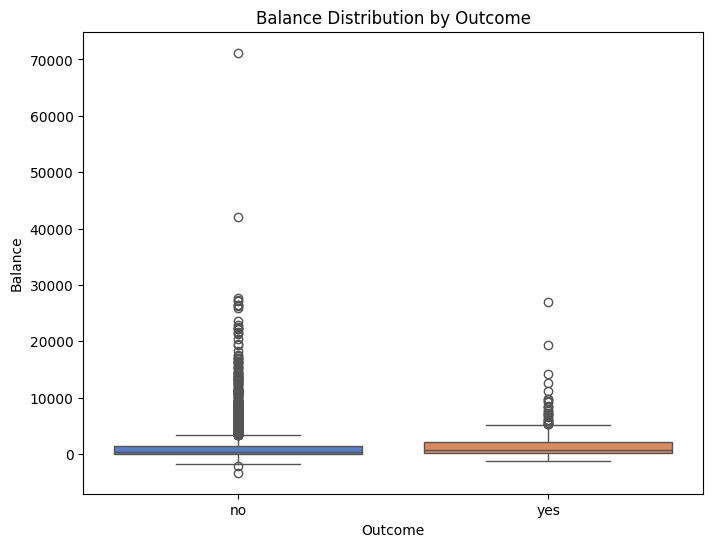

          count         mean          std     min    25%    50%     75%  \
outcome                                                                   
no       4000.0  1403.211750  3075.349313 -3313.0   61.0  419.5  1407.0   
yes       521.0  1571.955854  2444.398956 -1206.0  171.0  710.0  2160.0   

             max  
outcome           
no       71188.0  
yes      26965.0  


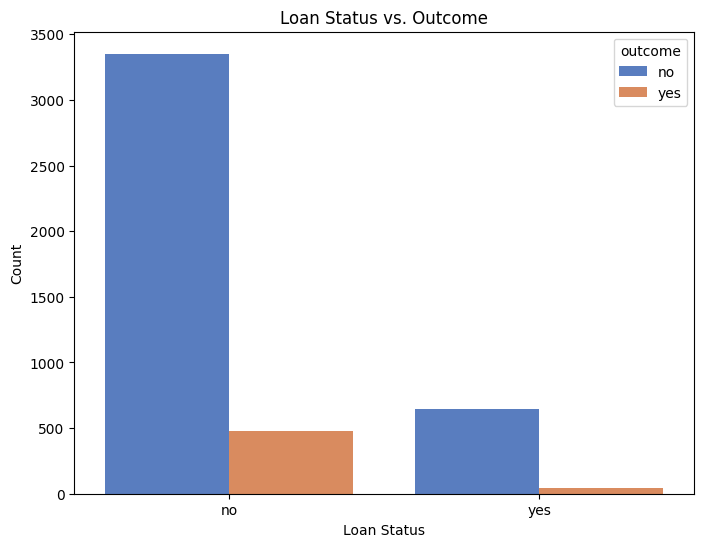

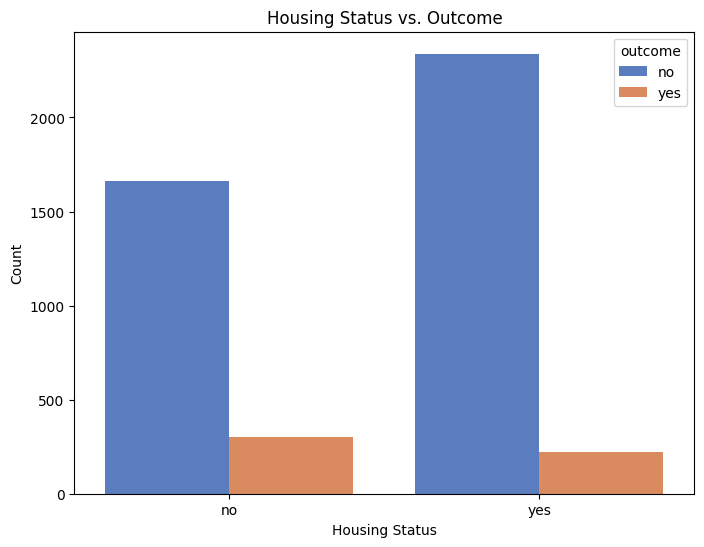

housing         no   yes
outcome loan            
no      no    1394  1958
        yes    267   381
yes     no     283   195
        yes     18    25


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'balance' by outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='outcome', y='balance', data=df, palette='muted')
plt.title("Balance Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Balance")
plt.show()

# Check summary statistics for 'balance' grouped by outcome
balance_summary = df.groupby('outcome')['balance'].describe()
print(balance_summary)

# Analyze the relationship between financial standing and the target variable
# Compare loan status (loan and housing) vs outcome

# Loan status vs outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='outcome', data=df, palette='muted')
plt.title("Loan Status vs. Outcome")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Housing status vs outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='outcome', data=df, palette='muted')
plt.title("Housing Status vs. Outcome")
plt.xlabel("Housing Status")
plt.ylabel("Count")
plt.show()

# Summary statistics for loan and housing by outcome
loan_housing_summary = df.groupby(['outcome', 'loan', 'housing']).size().unstack(fill_value=0)
print(loan_housing_summary)

Notes:
1. Balance Distribution:

   a. A boxplot is used to compare the balance between customers who subscribed to the term
       deposit ('yes') and those who didn't ('no').
       
   b. This allows us to visually check if the balance plays a significant role in influencing
       term deposit acquisition.

2. Loan and Housing Analysis:

   a. We use count plots to compare whether having a loan or a housing loan impacts term deposit
       subscription.
       
   b. The loan and housing features are categorical and are plotted against the target variable
       (outcome).
      
3. Summary Statistics:

   a. We summarize the financial standing features (balance, loan, and housing) using
       descriptive statistics and group the data by the target variable (outcome).
       
   b. This will provide insights into the relationship between financial status and outcome.

#### **Step 7: Evaluate Campaign Effectiveness**

Running below code will help evaluate the effectiveness of the current campaign strategies and provide insights into:

1. The importance of contact duration in converting leads.
2. Whether frequent campaigns or recent contacts have a better success rate.
3. The effect of previous campaign outcomes on current term deposit acquisition.

C:\Users\ryanw\AppData\Local\Temp\ipykernel_28908\3818644850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='duration', data=df, palette='muted')


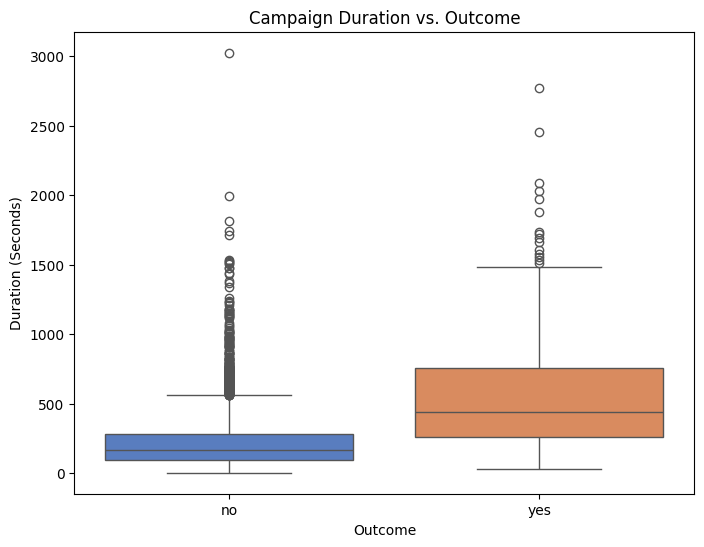

Campaign Duration Summary:
          count        mean         std   min    25%    50%    75%     max
outcome                                                                   
no       4000.0  226.347500  210.313631   4.0   96.0  167.0  283.0  3025.0
yes       521.0  552.742802  390.325805  30.0  260.0  442.0  755.0  2769.0


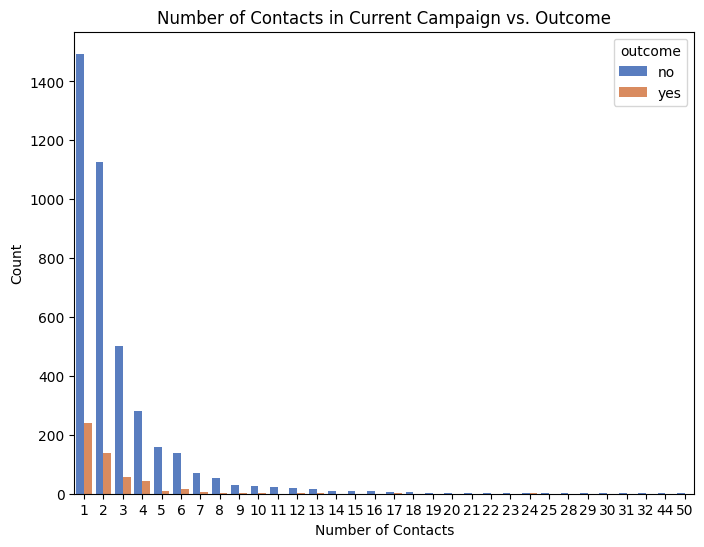


Campaign Contacts Summary:
          count      mean       std  min  25%  50%  75%   max
outcome                                                      
no       4000.0  2.862250  3.212609  1.0  1.0  2.0  3.0  50.0
yes       521.0  2.266795  2.092071  1.0  1.0  2.0  3.0  24.0


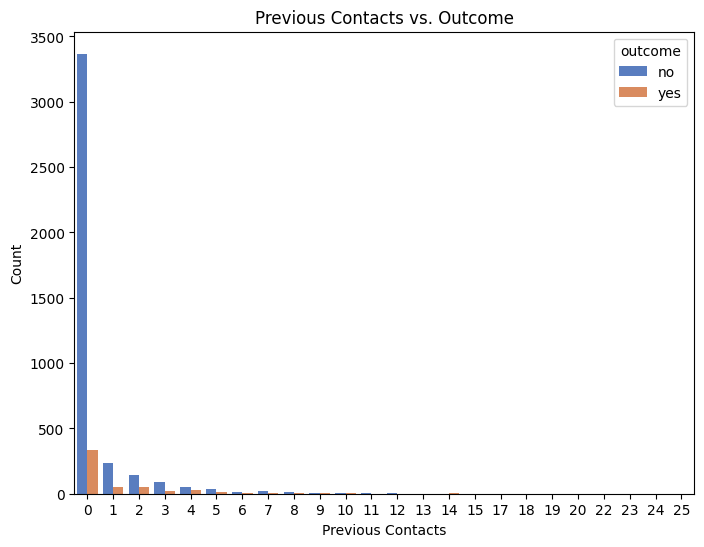


Previous Contacts Summary:
          count      mean       std  min  25%  50%  75%   max
outcome                                                      
no       4000.0  0.471250  1.627371  0.0  0.0  0.0  0.0  25.0
yes       521.0  1.090211  2.055368  0.0  0.0  0.0  2.0  14.0


C:\Users\ryanw\AppData\Local\Temp\ipykernel_28908\3818644850.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='pdays', data=df, palette='muted')


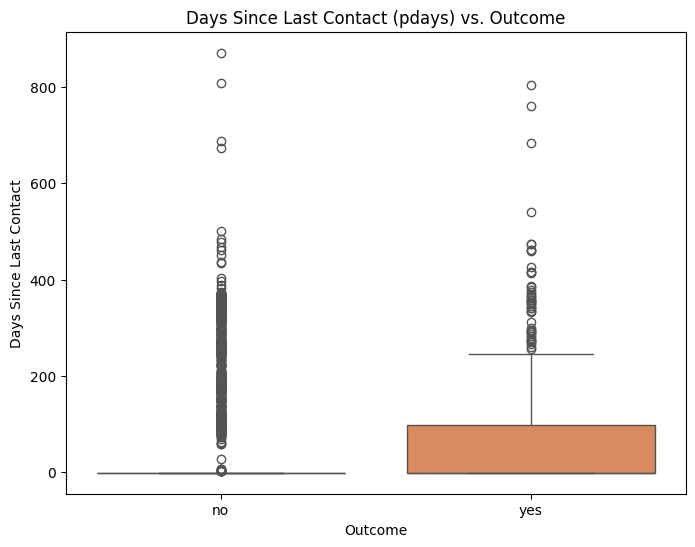


Days Since Last Contact (pdays) Summary:
          count       mean         std  min  25%  50%   75%    max
outcome                                                           
no       4000.0  36.006000   96.297657 -1.0 -1.0 -1.0  -1.0  871.0
yes       521.0  68.639155  121.963063 -1.0 -1.0 -1.0  98.0  804.0


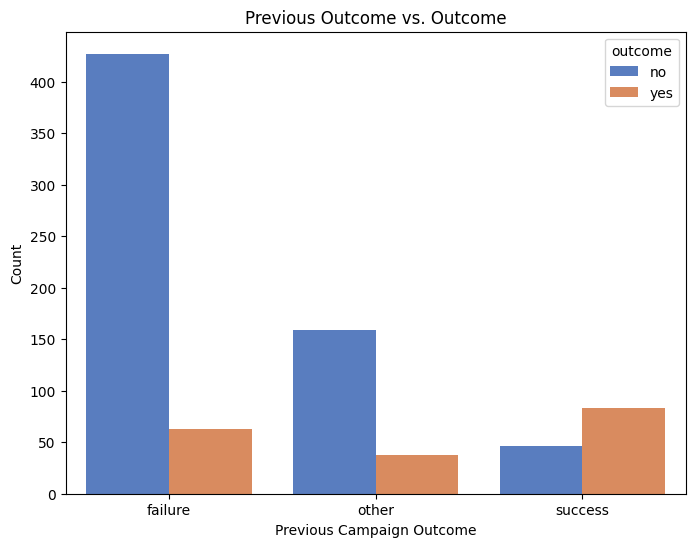


Previous Campaign Outcome Summary:
poutcome  failure  other  success
outcome                          
no            427    159       46
yes            63     38       83


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Duration vs. Outcome (Contact duration can give an indication of campaign effectiveness)
plt.figure(figsize=(8, 6))
sns.boxplot(x='outcome', y='duration', data=df, palette='muted')
plt.title("Campaign Duration vs. Outcome")
plt.xlabel("Outcome")
plt.ylabel("Duration (Seconds)")
plt.show()

# Summary statistics for 'duration' by outcome
duration_summary = df.groupby('outcome')['duration'].describe()
print("Campaign Duration Summary:")
print(duration_summary)

# 2. Campaign Contacts vs. Outcome (Number of contacts during this campaign)
plt.figure(figsize=(8, 6))
sns.countplot(x='campaign', hue='outcome', data=df, palette='muted')
plt.title("Number of Contacts in Current Campaign vs. Outcome")
plt.xlabel("Number of Contacts")
plt.ylabel("Count")
plt.show()

# Summary statistics for 'campaign' by outcome
campaign_summary = df.groupby('outcome')['campaign'].describe()
print("\nCampaign Contacts Summary:")
print(campaign_summary)

# 3. Previous Contacts vs. Outcome (Number of previous contacts could indicate familiarity)
plt.figure(figsize=(8, 6))
sns.countplot(x='previous', hue='outcome', data=df, palette='muted')
plt.title("Previous Contacts vs. Outcome")
plt.xlabel("Previous Contacts")
plt.ylabel("Count")
plt.show()

# Summary statistics for 'previous' by outcome
previous_summary = df.groupby('outcome')['previous'].describe()
print("\nPrevious Contacts Summary:")
print(previous_summary)

# 4. Pdays (Days since last contact) vs. Outcome (More recent contacts might have higher conversion)
plt.figure(figsize=(8, 6))
sns.boxplot(x='outcome', y='pdays', data=df, palette='muted')
plt.title("Days Since Last Contact (pdays) vs. Outcome")
plt.xlabel("Outcome")
plt.ylabel("Days Since Last Contact")
plt.show()

# Summary statistics for 'pdays' by outcome
pdays_summary = df.groupby('outcome')['pdays'].describe()
print("\nDays Since Last Contact (pdays) Summary:")
print(pdays_summary)

# 5. Previous Outcome vs. Outcome (What was the result of the previous campaign?)
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='outcome', data=df, palette='muted')
plt.title("Previous Outcome vs. Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.show()

# Summary of previous outcome vs. outcome
poutcome_summary = df.groupby('outcome')['poutcome'].value_counts().unstack(fill_value=0)
print("\nPrevious Campaign Outcome Summary:")
print(poutcome_summary)

Notes:

1. Campaign Duration (duration):

    a. A boxplot compares the duration of the last contact for customers who subscribed ('yes') versus those who didn’t ('no').
       
    b. The hypothesis is that longer durations may correlate with a higher likelihood of success in marketing campaigns.

2. Campaign Contacts (campaign):

    a. A count plot is used to compare the number of contacts during this campaign for each outcome.
       
    b. We look for patterns in how the number of contacts influences term deposit subscription.

3. Previous Contacts (previous):

    a. A count plot shows the effect of previous contacts on the outcome.
       
    b. The assumption is that customers with more previous contacts may have a higher likelihood of subscribing to a term deposit.

4. Days Since Last Contact (pdays):

    a. A boxplot compares the days since the last contact with the outcome.
       
    b. Shorter times may indicate more recent contact and could correlate with higher success rates.

5. Previous Outcome (poutcome):

    a. A count plot analyzes the outcome of previous campaigns and its influence on the current campaign.
       
    b. If the previous outcome was positive ('success'), it may increase the likelihood of a term deposit subscription.

#### **Step 8: Recommendations**

Based on the findings from previous analyses (customer demographics, financial standing, and campaign effectiveness), We can provide actionable recommendations to improve marketing strategies for term deposit acquisition. Below is a Python implementation for generating summaries and recommendations based on key observations.

In [24]:
# Summary statistics and counts for key features
def generate_summary():
    print("Key Insights and Recommendations:\n")
    
    # Customer demographics insights
    print("1. Customer Demographics:")
    age_insight = df.groupby('outcome')['age'].describe()
    print("\nAge Group Statistics by Outcome:")
    print(age_insight)
    print("Recommendation: Focus on targeting specific age groups that show higher subscription rates (e.g., middle-aged customers).\n")
    
    # Financial standing insights
    print("2. Financial Standing:")
    balance_summary = df.groupby('outcome')['balance'].describe()
    print("\nBalance Statistics by Outcome:")
    print(balance_summary)
    print("Recommendation: Customers with higher balances show better subscription rates. Prioritize marketing towards customers with healthy account balances.\n")
    
    # Campaign duration and effectiveness
    print("3. Campaign Effectiveness:")
    duration_summary = df.groupby('outcome')['duration'].describe()
    print("\nCall Duration Statistics by Outcome:")
    print(duration_summary)
    print("Recommendation: Calls with longer durations correlate with higher subscription rates. Train agents to engage customers effectively during calls.\n")
    
    campaign_summary = df['campaign'].value_counts()
    print("\nCampaign Contacts Distribution:")
    print(campaign_summary)
    print("Recommendation: Avoid excessive follow-ups as diminishing returns are seen after 2-3 calls. Focus on concise but impactful communications.\n")
    
    # Previous campaign insights
    poutcome_summary = df.groupby('outcome')['poutcome'].value_counts()
    print("\nPrevious Campaign Outcomes by Current Outcome:")
    print(poutcome_summary)
    print("Recommendation: Customers who had a successful previous campaign are more likely to subscribe. Leverage historical campaign data to identify and re-target potential customers.\n")

# Call the summary function
generate_summary()

Key Insights and Recommendations:

1. Customer Demographics:

Age Group Statistics by Outcome:
          count       mean        std   min   25%   50%   75%   max
outcome                                                            
no       4000.0  40.998000  10.188398  19.0  33.0  39.0  48.0  86.0
yes       521.0  42.491363  13.115772  19.0  32.0  40.0  50.0  87.0
Recommendation: Focus on targeting specific age groups that show higher subscription rates (e.g., middle-aged customers).

2. Financial Standing:

Balance Statistics by Outcome:
          count         mean          std     min    25%    50%     75%  \
outcome                                                                   
no       4000.0  1403.211750  3075.349313 -3313.0   61.0  419.5  1407.0   
yes       521.0  1571.955854  2444.398956 -1206.0  171.0  710.0  2160.0   

             max  
outcome           
no       71188.0  
yes      26965.0  
Recommendation: Customers with higher balances show better subscription rates.

>  Detailed Recommendations ...

1. Customer Demographics:

    a. Target age groups: Focus marketing efforts on middle-aged customers who show a higher likelihood of term deposit subscriptions.

    b. Education: Customers with higher education levels may respond better to financial products. Tailor campaigns with detailed product explanations for this group.

    c. Occupation: Professions such as "management" and "technician" have higher subscription rates. Personalize campaigns for these occupations.

2. Financial Standing:

    a. Balance: Customers with higher balances have a greater likelihood of subscribing. Provide targeted offers or financial incentives to this group.

    b. Housing and Loans: Customers without existing housing or personal loans may have higher disposable income. Highlight long-term benefits of term deposits to these segments.

3. Campaign Effectiveness:

    a. Call duration: Calls with longer durations often correlate with higher subscription rates. Train agents to build rapport and provide detailed explanations during calls.

    b. Optimal contact frequency: Avoid excessive follow-ups as diminishing returns are observed after 2-3 contacts. Focus on delivering impactful communication within fewer attempts.

    c. Leverage recent contacts: Customers contacted more recently (pdays) show better response rates. Prioritize follow-ups with recently contacted customers.

4. Historical Campaign Data:

    a. Previous campaign success: Customers with a successful outcome in prior campaigns are more likely to subscribe again. Use this information to re-target such customers.
    
    b. Negative outcomes: Analyze why customers with past negative outcomes are not subscribing and adjust strategies accordingly (e.g., address their concerns in future campaigns).
